In [1]:
pip install yfinance

You should consider upgrading via the 'C:\Users\Kavitha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import yfinance as yf

In [3]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-06-11,29084.666016,29401.916016,28236.212891,28360.810547,28360.810547,27246574439
2022-06-12,28373.513672,28502.685547,26762.648438,26762.648438,26762.648438,34163220274
2022-06-13,26737.578125,26795.589844,22141.257812,22487.388672,22487.388672,68204556440


In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Kavitha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


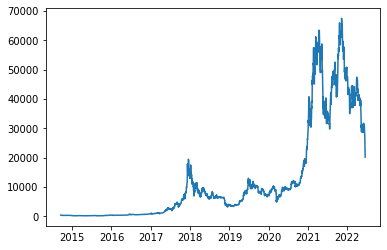

In [7]:
plt.plot(df.index, df['Adj Close'])

In [8]:
# train test split
to_row=int(len(df)*0.9)
training_data=list(df[0: to_row]['Adj Close'])
training_data

[457.3340148925781,
 424.44000244140625,
 394.7959899902344,
 408.90399169921875,
 398.8210144042969,
 402.1520080566406,
 435.7909851074219,
 423.2049865722656,
 411.5740051269531,
 404.42498779296875,
 399.5199890136719,
 377.1809997558594,
 375.4670104980469,
 386.9440002441406,
 383.614990234375,
 375.0719909667969,
 359.5119934082031,
 328.8659973144531,
 320.510009765625,
 330.0790100097656,
 336.18701171875,
 352.94000244140625,
 365.0260009765625,
 361.56201171875,
 362.29901123046875,
 378.54901123046875,
 390.41400146484375,
 400.8699951171875,
 394.77301025390625,
 382.5559997558594,
 383.75799560546875,
 391.4419860839844,
 389.5459899902344,
 382.8450012207031,
 386.4750061035156,
 383.1579895019531,
 358.4169921875,
 358.3450012207031,
 347.27099609375,
 354.7040100097656,
 352.989013671875,
 357.6180114746094,
 335.59100341796875,
 345.30499267578125,
 338.3210144042969,
 325.7489929199219,
 325.8919982910156,
 327.5539855957031,
 330.49200439453125,
 339.4859924316406,


In [9]:
testing_data=list(df[to_row:]['Adj Close'])
testing_data

[52633.53515625,
 46811.12890625,
 46091.390625,
 46391.421875,
 44883.91015625,
 45201.45703125,
 46063.26953125,
 44963.07421875,
 47092.4921875,
 48176.34765625,
 47783.359375,
 47267.51953125,
 48278.36328125,
 47260.21875,
 42843.80078125,
 40693.67578125,
 43574.5078125,
 44895.09765625,
 42839.75,
 42716.59375,
 43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125,
 48199.953125,
 49112.90234375,
 51514.8125,
 55361.44921875,
 53805.984375,
 53967.84765625,
 54968.22265625,
 54771.578125,
 57484.7890625,
 56041.05859375,
 57401.09765625,
 57321.5234375,
 61593.94921875,
 60892.1796875,
 61553.6171875,
 62026.078125,
 64261.9921875,
 65992.8359375,
 62210.171875,
 60692.265625,
 61393.6171875,
 60930.8359375,
 63039.82421875,
 60363.79296875,
 58482.38671875,
 60622.13671875,
 62227.96484375,
 61888.83203125,
 61318.95703125,
 61004.40625,
 63226.40234375,
 62970.046875,
 61452.23046875,
 61125.67578125,
 61527.480468

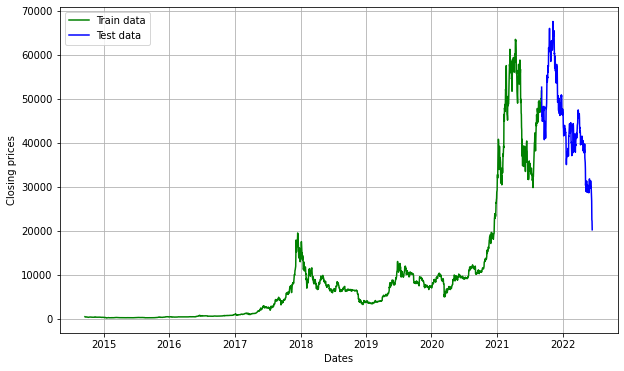

In [10]:
#spliting data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close'], 'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label= 'Test data')
plt.legend()

In [11]:
model_predictions=[]
n_test_obser =len(testing_data)

In [12]:
import statsmodels.api as sm

In [13]:
for i in range(n_test_obser):
    model =sm.tsa.arima.ARIMA(training_data, order =(4,1,0))
    model_fit= model.fit()
    output=model_fit.forecast()
    yhat =list(output)[0]
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)
   # print(output)
    #break

In [14]:
list(output)[0]

22141.392972997073

In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2828
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22928.882
Date:                Wed, 15 Jun 2022   AIC                          45867.764
Time:                        15:18:33   BIC                          45897.499
Sample:                             0   HQIC                         45878.492
                               - 2828                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0262      0.010     -2.667      0.008      -0.045      -0.007
ar.L2          0.0037      0.009      0.397      0.692      -0.015       0.022
ar.L3          0.0197      0.010      1.943      0.0

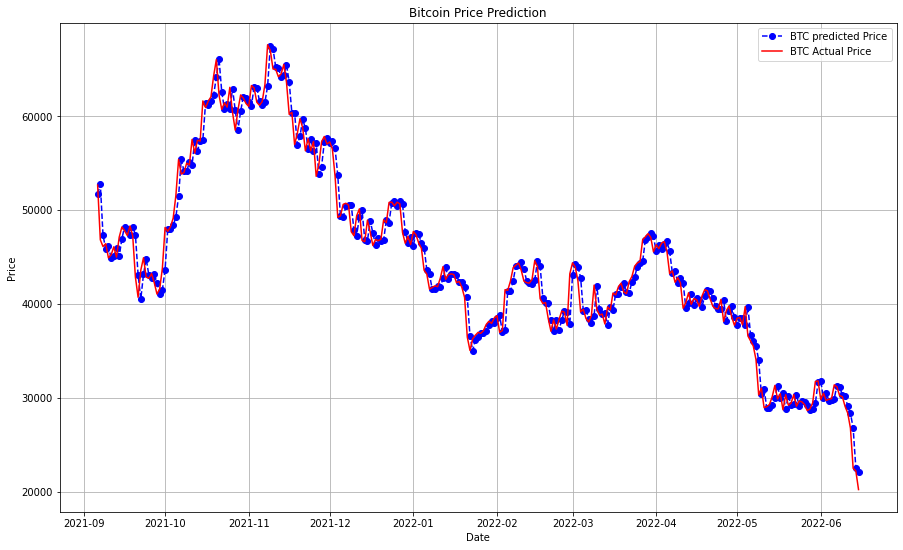

In [17]:
plt.figure(figsize=(15,9))
plt.grid(True)
date_range=df[to_row:].index
plt.plot(date_range, model_predictions[:],color='blue', marker='o', linestyle='dashed', label='BTC predicted Price')
plt.plot(date_range, testing_data, color='red', label='BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [20]:
mape=np.mean(np.abs(np.array(model_predictions[:]) -np.array(testing_data))/np.abs(testing_data))

In [21]:
print('MAPE: '+str(mape))

MAPE: 0.02689551268854771


In [22]:
# the above mape is used for report performance
#Mape means mean Absolute percentage error
# Around 2.6% MAPE implies the model is about 96.4% accurate in predicting the test set observations.